# Implementação e Exercícios - Deep Learning I

#### Exercícios desenvolvidos durante o MBA em Data Science / IA na FIAP - 2022~2023. Prof. Dheny Fernandes

Vamos começar implementando algumas funções de ativação e analisar seu comportamento. Para isso, vamos usar uma função auxiliar que permitirá a visualização dessas funções:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#helper function
def plot(func, yaxis=(-1.4, 1.4)):
    plt.ylim(yaxis)
    plt.locator_params(nbins=5)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axhline(lw=1, c='black')
    plt.axvline(lw=1, c='black')
    plt.grid(alpha=0.4, ls='-.')
    plt.box(on=None)
    plt.plot(x, func(x), c='r', lw=3)

In [3]:
# vetor contendo dados para plotar as funções
x = np.arange(-5, 5, 0.01)

## Binary Step

$$
f(x) = \left\{
        \begin{array}{lll}
            0 & for & x \leq 0  \\
            1 & for & x > 0
        \end{array}
    \right.
$$

$$
f'(x) = \left\{
        \begin{array}{lll}
            0 & for & x \neq 0  \\
            ? & for & x = 0
        \end{array}
    \right.
$$

In [4]:
binary_step = np.vectorize(lambda x: 1 if x > 0 else 0, otypes=[np.float64])

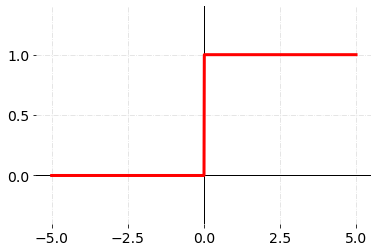

In [5]:
plot(binary_step, yaxis=(-0.4, 1.4))

## Hyperbolic Tangent, TanH

Essa função normaliza o output de cada neurônio entre [-1,1]. Entretanto, ela sofre do problema conhecido como *vanishing gradient*, ou seja, quase não produz mudanças na predição para valores muito grandes ou muito pequenos de inputs, fazendo com a rede deixe de aprender. 

$$
f(x)={\frac {2}{1+e^{-2x}}}-1
$$

$$
f'(x)=1-f(x)^2
$$

In [6]:
def tanh(x):
    return 2 / (1 + np.exp(-2 * x)) -1

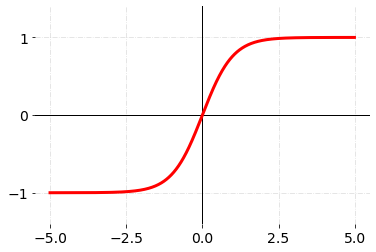

In [7]:
plot(tanh)

## Rectified Linear Units, ReLU
Nesta função, os outputs podem variar de 0 até infinito quando o input é positivo, mas quando o input é 0 ou negativo, a função retorna como output 0 e isso pode atrapalhar no cálculo do *backpropagation*. 

$$
f(x) = \left\{
        \begin{array}{lll}
            0 & for & x \leq 0  \\
            x & for & x > 0
        \end{array}
    \right.
$$

$$
f'(x) = \left\{
        \begin{array}{lll}
            0 & for & x \leq 0  \\
            1 & for & x > 0
        \end{array}
    \right.
$$

In [8]:
relu = np.vectorize(lambda x: x if x > 0 else 0, otypes=[np.float64])

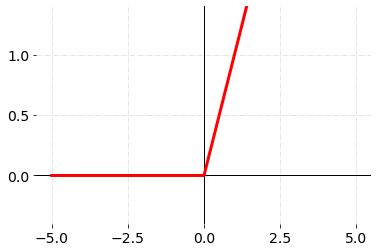

In [9]:
plot(relu, yaxis=(-0.4, 1.4))

## Leaky Rectified Linear Units, Leaky ReLU
A *Leaky ReLU* foi criada para resolver o problema da ReLU, ou seja, permitir que o *backpropagation* execute sem erros.

$$
f(x) = \left\{
        \begin{array}{lll}
            ax & for & x \leq 0  \\
            x & for & x > 0
        \end{array}
    \right.
$$

$$
f'(x) = \left\{
        \begin{array}{lll}
            a & for & x \leq 0  \\
            1 & for & x > 0
        \end{array}
    \right.
$$

In [10]:
leaky_relu = np.vectorize(lambda x: max(0.1 * x, x), otypes=[np.float64])

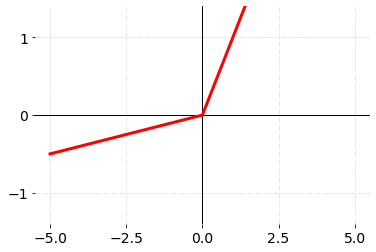

In [11]:
plot(leaky_relu)

# ToDo 1

A função sigmoid é uma das mais usadas para problemas em geral. Baseado na equação abaixo, implemente uma função que calcule a sigmoid. Use a função plot para plotar os valores usando a variável *x* como input.  

$$
f(x)={\frac {1}{1+e^{-x}}}
$$

$$
f'(x)=f(x)(1-f(x))
$$

In [12]:
# resposta
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

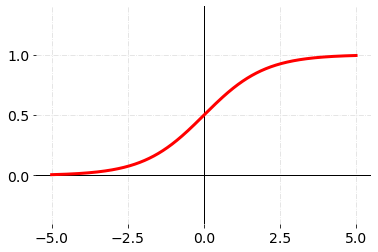

In [13]:
plot(sigmoid, yaxis=(-0.4, 1.4))

## Perguntas:

### 1. Essas funções podem ser usadas tanto nas camadas ocultas quanto nas camadas de saída?

> _Sim, as funções de ativação podem ser usadas tanto nas camadas ocultas quanto nas camadas de saída de uma rede neural. No entanto, a escolha da função de ativação pode depender do tipo de problema que está sendo resolvido e da arquitetura da rede neural._

### 2. Como determinar a função a ser usada? 

> _A determinação da função de ativação geralmente depende do tipo de problema que você está tentando resolver e das características dos dados. Em linhas gerais:_
>
> * _**ReLU (Rectified Linear Unit)**: É uma boa escolha como função de ativação para as camadas ocultas de redes neurais, pois pode ajudar a resolver o problema de gradiente desaparecendo durante o treinamento._
> * _**Leaky ReLU**: Pode ser uma variação útil do ReLU para resolver o problema do "dying ReLU" (neurônios que param de aprender)._
> * _**Sigmoid**: É comumente usada na camada de saída de redes neurais para solução de problemas de classificação binária, onde a saída deve estar entre 0 e 1._
> * _**Hyperbolic Tangent (tanh)**: Similar à sigmoid, mas produz saídas variando de -1 a 1. Pode ser útil para problemas de classificação multiclasses._
> 
> _Além disso, a escolha da função de ativação pode ser influenciada também pelo esforço computacional envolvido, como a facilidade de cálculo e a estabilidade do treinamento. Em alguns casos, pode ser útil experimentar diferentes funções de ativação e verificar qual delas oferece o melhor desempenho para o problema que está sendo resolvido._

# Gradiente Descendente
Agora, vamos implementar as funções básicas do algoritmo Gradiente Descendente e testá-las num dataset pequeno. Antes, porém, vamos começar com algumas funções que nos auxiliarão a plotar e visualizar os dados. 

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#funcão para visualizar os dados a serem classificados
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

# plota a fronteira de decisao que o algoritmo encontrou
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

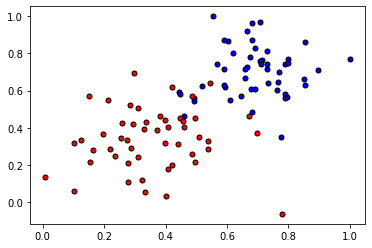

In [15]:
#leitura dos dados
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

# ToDo 2
Implemente as seguintes funções vistas em aula:

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$


In [16]:
# resposta
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y * np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

In [17]:
# função auxiliar para treinar a rede neural. Ele itera o gradiente descendente sobre todos os dados para um determinado número
# de épocas. Também plota os dados e a fronteira de decisão encontrada. 
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # imprimindo o erro no conjunto de treino
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            
            # convertende o output (float) para booleano, visto que é classificação binária
            predictions = out > 0.5
            
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Fronteira de decisão
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # dados
    plot_points(features, targets)
    plt.show()

    # erro
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

Vamos treinar o algoritmo.

Quando executamos a função, obtemos o seguinte:

* 10 atualizações com o valor atual da loss e acurácia
* Um plot com os dados e algumas fronteiras de decisão encontradas. A final está em **preto**. Observe como as linhas vão se aproximando da solução ótima conforme o número de épocas vai passando. 
* Um plot do erro. Observe como o valor reduz a cada época. 


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669507
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.45933346418614013
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.39734615716713984
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.37414697652390744
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.33792736588799216
Accuracy:  0.94


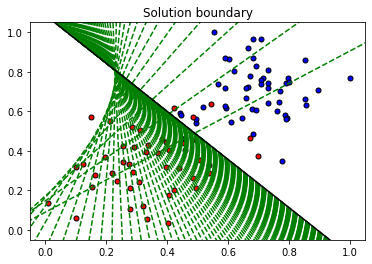

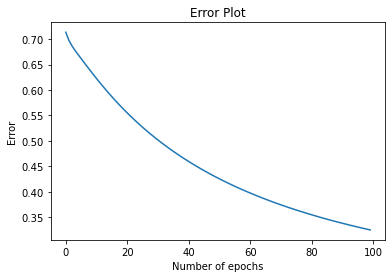

In [18]:
train(X, y, epochs, learnrate, True)

# Usando Scikit-Learn

No dia a dia, é mais prático usar soluções já implementadas e otimizadas, principalmente quando lidamos com datasets grandes. Nesse sentido, a Scikit-Learn se torna uma grande aliada. Para entendermos como ela pode nos auxiliar, vamos ver um caso prático simples e, depois, implementar uma solução para um problema bastante conhecido em Deep Learning

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.linear_model
from sklearn.neural_network import MLPClassifier

from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

Vamos carregar o conjunto de dados no qual trabalharemos. O código abaixo o carregará nas variáveis X e Y

In [20]:
X, Y = load_planar_dataset()
Y = Y[0] #neste dataset Y tem uma dimensao a mais, vamos remove-la
X.shape

(2, 400)

Observe que nossa base de dados contém duas características (X1 e X2) e o rótulo (vermelho:0 e roxo:1)

Vamos plotá-lo

In [21]:
%matplotlib inline

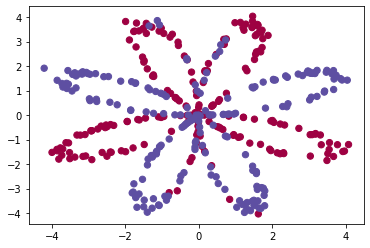

In [22]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

Observe que este problema é bastante complexo para conseguirmos separar os pontos azuis dos vermelhos com apenas uma linha, como faríamos com um modelo linear simples. Para efeitos de ilustração, vamos tentar empregar uma regressão logística:

In [23]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

LogisticRegressionCV()

Taxa de acerto da Regressão Logística: 0.460000 


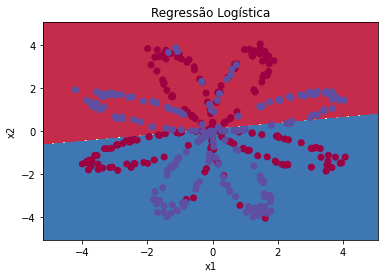

In [24]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Regressão Logística")

LR_predictions = clf.predict(X.T)
print ('Taxa de acerto da Regressão Logística: %f ' % float(np.mean(LR_predictions == Y[0])))

Para casos como este precisamos de modelos mais complexos, com superfícies de decisões não lineares. Como as Redes Neurais podem ser vistas como um conjunto de funções lineares combinadas, elas nos possibilitam obter fronteiras de decisão mais complexas

Vamos treinar o modelo Neural abaixo para vermos se obtemos um resultado melhor

<img src="imagens/simple_nn.png" width="500">

Matematicamente, para um exemplo $x^{(i)}$ temos:

$
z^{[1](i)}=W^{[1]}x^{[1](i)}+b^{[1](i)}\\
a^{[1](i)} = tanh(z^{[1](i)})\\
z^{[2](i)} = W^{[2]}a^{[1](i)}+b^{[2](i)}\\
\hat{y }^{(i)} = a^{[2](i)} = \sigma(z^{[2](i)})\\
\begin{equation}
  y^{(i)}_{predito} ==\left\{
  \begin{array}{@{}ll@{}}
    0, & \text{se}\ a^{[2](i)} > 0.5\\
    1, & \text{caso contrário}
  \end{array}\right.
\end{equation} 
\tag{1}$

Dado os valores preditos, podemos calcular a função de custo por:

$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large \right) \small \tag{2}$

O Scikit-learn nos oferece um pacote para trabalharmos com redes Perceptron, para isso definimos a arquitetura da rede como:

In [25]:
clf = MLPClassifier(hidden_layer_sizes=(4, 1), activation='tanh', random_state=42)

In [26]:
clf.fit(X.T, Y.T)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(4, 1), random_state=42)

Taxa de acerto da Rede Neural: 0.510000 


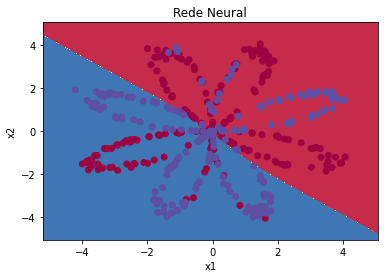

In [27]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Rede Neural")

NN_predictions = clf.predict(X.T)
print ('Taxa de acerto da Rede Neural: %f ' % float(np.mean(NN_predictions == Y[0])))

Observe que com este modelo conseguimos construir uma superfície de decisão um pouco "curva" no espaço $R^2$, já que não estamos mais trabalhando com modelos lineares. Com isso aumentamos nossa taxa de acerto

Vamos tentar modelos mais complexos para observarmos esse comportamento

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Taxa de acerto da Rede Neural: 0.697500 


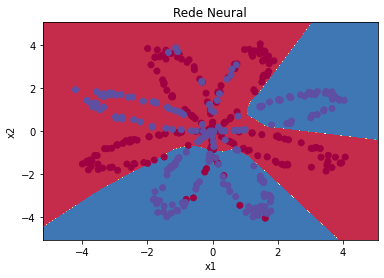

In [28]:
clf = MLPClassifier(hidden_layer_sizes=(10, 8, 4, 2), activation='relu', random_state=42)
clf.fit(X.T, Y.T)
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Rede Neural")

NN_predictions = clf.predict(X.T)
print ('Taxa de acerto da Rede Neural: %f ' % float(np.mean(NN_predictions == Y[0])))

Um hiper parâmetro muito importante a ser configurado em um NN é o learning_rate. Caso ele seja muito baixo, a rede necessitará de muitas interações para convergir (muitas vezes milhões), o que inviabiliza o projeto. Porém, se ele for muito alto pode haver um "salto" do mínimo da função pelo gradiente, impossibilitando a convergência do modelo.

<img src="imagens/sgd.gif">

<img src="imagens/sgd_bad.gif">

Vamos testar no nosso exemplo:

Taxa de acerto da Rede Neural: 0.275000 


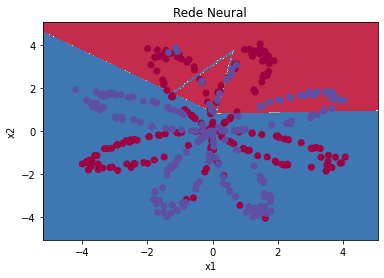

In [29]:
clf = MLPClassifier(hidden_layer_sizes=(4, 4), activation='tanh', random_state=42, learning_rate_init=10.0)
clf.fit(X.T, Y.T)
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Rede Neural")

NN_predictions = clf.predict(X.T)
print ('Taxa de acerto da Rede Neural: %f ' % float(np.mean(NN_predictions == Y[0])))

Observe que mesmo utilizando um modelo mais complexo, a nossa rede não conseguiu convergir para o mínimo de erro

Taxa de acerto da Rede Neural: 0.640000 


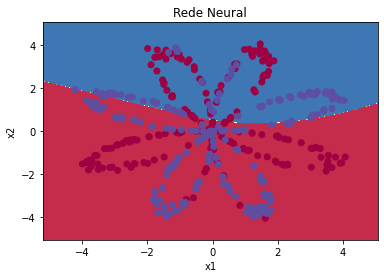

In [30]:
clf = MLPClassifier(hidden_layer_sizes=(4, 4), activation='tanh', random_state=42, learning_rate_init=0.00001)
clf.fit(X.T, Y.T)
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Rede Neural")

NN_predictions = clf.predict(X.T)
print ('Taxa de acerto da Rede Neural: %f ' % float(np.mean(NN_predictions == Y[0])))

O mesmo acontece com uma learning rate muito baixa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Taxa de acerto da Rede Neural: 0.552500 


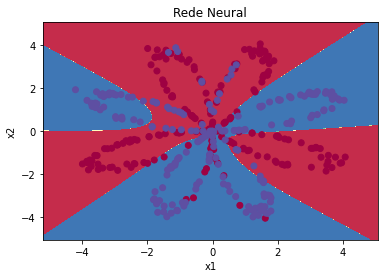

In [31]:
clf = MLPClassifier(hidden_layer_sizes=(4, 4), activation='tanh', random_state=42, learning_rate_init=0.001)
clf.fit(X.T, Y.T)
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Rede Neural")

NN_predictions = clf.predict(X.T)
print ('Taxa de acerto da Rede Neural: %f ' % float(np.mean(NN_predictions == Y[0])))

Por fim, uma learning rate adequada resulta em um modelo mais preciso

E para prevermos um valor:

In [32]:
clf.predict([[2.5, 0.75]])

array([1], dtype=uint8)

Assim, nosso ponto $(2.5, 0.75)$ é da classe roxo (ou azul)

In [33]:
clf.predict_proba([[2.5, 0.75]])

array([[0.32304657, 0.67695343]])

A probabilidade para a classe vermelha é 0.32 e para a roxa 0.68

# ToDo 3
Agora é hora de usar esse conhecimento que acabamos de obter e aplicá-lo num conjunto de dados real e mais complexo. Vamos usar o dataset [MNIST](https://en.wikipedia.org/wiki/MNIST_database).



In [34]:
import gzip
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [35]:
#como o dataset foi criado em Python 2, é necessário o encoding latin1 para carregá-lo em Python 3
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

O dataset é composto de 70k exemplos, divididos em 50k para treino, 10k para validação e 10k para teste. Cada exemplo é uma imagem 28x28 em escala de cinza contendo um dígito. Vamos ver alguns exemplos:

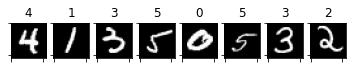

In [36]:
# Plot random examples
examples = np.random.randint(10000, size=8)
n_examples = len(examples)
plt.figure()
for ix_example in range(n_examples):
    tmp = np.reshape(train_set[0][examples[ix_example],:], [28,28])
    ax = plt.subplot(1,n_examples, ix_example + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(train_set[1][examples[ix_example]]))
    plt.imshow(tmp, cmap='gray')

Manipulando o conjunto de treino e teste. Aqui, não vamos usar o conjunto de validação:

In [37]:
# Training data
train_X = train_set[0]
train_y = train_set[1]
print('Shape of training set: ' + str(train_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(train_y)
labels = np.unique(train_y)
train_Y = np.zeros((n_examples, len(labels)))
for ix_label in range(len(labels)):
    # Find examples with with a Label = lables(ix_label)
    ix_tmp = np.where(train_y == labels[ix_label])[0]
    train_Y[ix_tmp, ix_label] = 1


# Test data
test_X = test_set[0]
test_y = test_set[1] 
print('Shape of test set: ' + str(test_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(test_y)
labels = np.unique(test_y)
test_Y = np.zeros((n_examples, len(labels)))
for ix_label in range(len(labels)):
    # Find examples with with a Label = lables(ix_label)
    ix_tmp = np.where(test_y == labels[ix_label])[0]
    test_Y[ix_tmp, ix_label] = 1


Shape of training set: (50000, 784)
Shape of test set: (10000, 784)


1. Defina os hiperparâmetros da rede neural e instancie um modelo MLP da scikit learn:
    * número de camadas
    * nós em cada camada
    * função de ativação
    
**Dica**: para definir a quantidade de nós em cada camada pense no formato dos dados de entrada e quantas saídas deverá ter a rede. As camadas ocultas podem ter valores arbitrários

In [38]:
#resposta
mlp = MLPClassifier(hidden_layer_sizes=(784, 25, 10, 10), activation='relu', random_state=42)
mlp

MLPClassifier(hidden_layer_sizes=(784, 25, 10, 10), random_state=42)

2. Treine o modelo
**Dica**: use train_Y ao invés de train_y

In [39]:
mlp.fit(train_X, train_Y)

MLPClassifier(hidden_layer_sizes=(784, 25, 10, 10), random_state=42)

3. Faça a predição do conjunto de teste

In [40]:
y_pred = mlp.predict(test_X)

4. Imprima o classification report [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(test_y, np.argmax(y_pred, axis=1)))
#support é o número de ocorrencias reais da classe no conjunto de dados especificado

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.95      0.97       892
           6       0.98      0.96      0.97       958
           7       0.99      0.95      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

